# Machine Learning: Basic Principles 2018

# Feature Learning

### Learning goals

In this exercise you will learn how to use __principal component analysis (PCA)__ for __feature learning__. PCA allows us to optimally compress the information contained in high-dimensional raw feature vectors into a small set of new features, which are called __principal components__ (PC). These new features are then used for formulating and solving an overall ML problem  (regression or classification). Using the PCs as features (instead of the raw feature vectors) is beneficial in terms of computational complexity (using smaller feature vectors means less computation) and statistical properties of the learning method (smaller feature vectors reduces the risk of overfitting). Moreover, using the first two PCs allows to visualize high-dimensional data points conveniently using a scatter plot.


### Exercise Contents

1. [Data](#data)
2. Exercise
    - 2.1 [Implement Principal Component Analysis (PCA)](#Q1)
    - 2.2 [Compression vs.  Information Loss](#Q2)
    - 2.3 [PCA for Data Visualization](#Q3)

### Keywords
`principal component analysis (PCA)`, `eigenvalue decomposition`, `data visualization`, `overfitting`.

## 1. The Data
<a id="data"></a>
In this exercise we will work with a dataset containing fruits, more precisely apples and bananas. 
The available dataset consists of $N=30$ pictures, saved in the folder named `fruits`:
* 15 images of apples (`image_1.jpg` to `image_15.jpg`)
* 15 images of bananas (`image_16.jpg` to `image_30.jpg`)

The images are color images, but for this image we convert them to grayscale. This means that each pixel has one value between 0 and 255, where 0 means white and 255 means black. The size of the images is $50x50$ pixels. We convert each image to an array of length 2500. 

The following code block loads the images and stores them in the array `datamatrix`. We also plot six of the images, to get a feeling for the data. 

The shape of the datamatrix is (30, 2500)


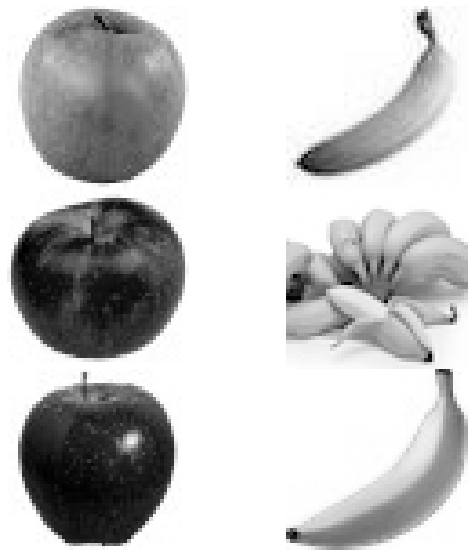

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

samplesize = 30
dataset = np.zeros((samplesize,50,50),dtype=np.uint8)

for i in range(1,samplesize+1):
    # with convert('L') we convert the images to grayscale
    img = Image.open('./fruits/%s.jpg'%(str(i))).convert('L')
    dataset[i-1] = np.array(img,dtype=np.uint8)
  
# Reshaping the images as vectors of length 2500 and store them in the rows of "datamatrix"
datamatrix = np.reshape(dataset,(samplesize,-1))
print("The shape of the datamatrix is", datamatrix.shape)

fig,ax = plt.subplots(3,2,figsize=(10,10),gridspec_kw = {'wspace':0, 'hspace':0})

for i in range(3):
    for j in range(2):
        ax[i,j].imshow(dataset[12+i+j*3], cmap='gray')
        ax[i,j].axis('off')
plt.show()

## 2 Exercise
The actual exercise starts from here and it has been divided into 3 tasks:
* 2.1 Implement Principal Component Analysis (PCA)
* 2.2 Compression vs.  Information Loss
* 2.3 PCA for Data Visualization


## 2.1 Implement Principal Component Analysis (PCA)
<a id="Q1"></a>

Each fruit image is represented by the raw data vector  $\mathbf{z}^{(i)} \in \mathbb{R}^{D}$, which contains the grayscale values for each of the $D=2500$ pixels. 
The aim of PCA is to find the (in a certain sense) optimal compression matrix $\mathbf{W} \in \mathbb{R}^{d \times D}$, with the number of features $d \ll D$, that transforms the raw data vector $\mathbf{z}^{(i)}$ to a short feature vector $\mathbf{x}^{(i)}$. 

\begin{equation}
    \mathbf{x}^{(i)}=\mathbf{W} \mathbf{z}^{(i)}. 
    \tag{1} 
    \label{eq:1}
\end{equation}

The optimal compression matrix $\mathbf{W}$ is the matrix which gives the lowest loss of information. We quantify the loss of information when replacing the original raw data vectors $\mathbf{z}^{(i)}$ with the new feature vectors $\mathbf{x}^{(i)}$ by the smallest possible  error achieved by reconstructing (in a linear fashion) the raw data vector $\mathbf{z}^{(i)}$ from the new feature vector $\mathbf{x}^{(i)}$. The reconstruction error is given by: 

\begin{align}
 \mathcal{E}(\mathbf{W}) & = \min_{\mathbf{R} \in \mathbb{R}^{D \times d}} \dfrac{1}{N} \sum_{i=1}^{N} \| \mathbf{z}^{(i)} - \mathbf{R} \mathbf{x}^{(i)} \|^{2}  \nonumber \\ 
 & \stackrel{\eqref{eq:1}}{=} \min_{\mathbf{R} \in \mathbb{R}^{D \times d}} \dfrac{1}{N} \sum_{i=1}^{N} \| \mathbf{z}^{(i)} - \mathbf{R} \mathbf{W} \mathbf{z}^{(i)} \|^{2}.
 \label{eq:2}
 \tag{2}
\end{align} 

Note that the optimal reconstruction matrix $\mathbf{R}$ depends on the given compression matrix $\mathbf{W}$. However, we are not interested in the optimal reconstruction matrix itself but only in the associated minimum reconstruction error $\mathcal{E}(\mathbf{W})$. In order to construct the optimal compression matrix $\mathbf{W}$ which minimizes the reconstruction error $\mathcal{E}(\mathbf{W})$, we will use the eigenvalue decomposition of the sample covariance matrix $\mathbf{Q}$. 

\begin{equation}
\mathbf{Q} = \dfrac{1}{N} \mathbf{Z}^{T} \mathbf{Z} \mbox{ with data matrix } \mathbf{Z}=\big(\mathbf{z}^{(1)},\ldots,\mathbf{z}^{(N)} \big)^{T} \in \mathbb{R}^{N \times D}. 
\label{eq:3}
\tag{3}
\end{equation}

Since the matrix $\mathbf{Q}$ is **positive semi-definite**, it has an eigenvalue decomposition of the form 

\begin{equation}
\mathbf{Q} = \big( \mathbf{u}^{(1)},\ldots,\mathbf{u}^{(D)}\big) {\rm diag} \{\lambda^{(1)},\ldots,\lambda^{(D)} \} 
 \big( \mathbf{u}^{(1)},\ldots,\mathbf{u}^{(D)}\big)^{T}.
\end{equation} 

Here, the orthonormal vectors $\mathbf{u}^{(r)}$ are eigenvectors of $\mathbf{Q}$, which correspond to the decreasingly ordered eigenvalues $\lambda^{(1)} \geq \lambda^{(2)} \geq \ldots \geq \lambda^{(D)}$ of $\mathbf{Q}$. 

It can be shown that the reconstruction error $\mathcal{E}(\mathbf{W}_{\rm PCA}) = \min_{\mathbf{W} \in \mathbb{R}^{d \times D}} \mathcal{E}(\mathbf{W})$ (see \eqref{eq:2}) can only be minimal for the particular compression matrix 

\begin{equation}
\label{eq:4}
\tag{4}
\mathbf{W}_{\rm PCA} = \big( \mathbf{u}^{(1)},\ldots,\mathbf{u}^{(d)} \big)^{T},\in \mathbb{R}^{d \times D}
\end{equation}

whose rows are the eigenvectors $\mathbf{u}^{(1)},\ldots,\mathbf{u}^{(d)}$ of $\mathbf{Q}$ corresponding to the 
$d$ largest eigenvalues $\lambda^{(1)},\ldots,\lambda^{(d)}$ of $\mathbf{Q}$. 

Moreover, it can be shown that the minimum reconstruction error $\mathcal{E}(\mathbf{W}_{\rm PCA})$ is achieved 
for the reconstruction matrix $\mathbf{R} = \mathbf{W}_{\rm PCA}^{T}$. This simplifies the reconstruction error $\mathcal{E}(\mathbf{W}_{\rm PCA})$ to 

\begin{equation}
\label{eq:5}
\tag{5}
\mathcal{E}(\mathbf{W}_{\rm PCA}) = \sum_{r = d+1}^{D} \lambda^{(r)}. 
\end{equation} 

For an intuitive explanation of PCA, this is an excellent StackExchange answer: https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues


#### Tasks
- Implement a Python function `compute_pca`, which has two input arguments: the data matrix $\mathbf{Z}$ and the number $d$ of new features (principal components). In particular:
 
    - compute the sample covariance matrix $\mathbf{Q}=\dfrac{1}{N} \mathbf{Z}^{T} \mathbf{Z}$ (see \eqref{eq:3})
    - compute eigenvectors $(\mathbf{u}^{(1)},...,\mathbf{u}^{(D)})$ and corresponding eigenvalues $(\lambda^1,...,\lambda^D)$ of $\mathbf{Q}$. (see the Round 1 - Introduction notebook for a review of eigendecomposition in Python). 
    - sort the eigenvalues in a decreasing order: $\lambda^{(1)} \geq \lambda^{(2)} \geq...\lambda^{(D)} \geq 0$.
    - choose $d$ eigenvectors corresponding to the $d$  largest eigenvalues to form the compression matrix $\mathbf{W}_{\rm PCA}=(\mathbf{u}^{(1)},...,\mathbf{u}^{(d)})^{T} \in \mathbb{R}^{d \times D}$ 
    - return the compresssion matrix $\mathbf{W}_{\rm PCA}$ (see \eqref{eq:4}) and all eigenvalues of $\mathbf{Q}$.

**Note:** You may get eigenvectors and eigen values in complex data type (a+bi format), this occurs due to small numerical errors in calculation. The imaginary term is usually zero and can be ignored. The real part can be extracted using `.real`. 

In [2]:
def compute_pca(Z, d):
    # Input: the N by D data matrix Z, the number of components d
    # Output: a d by D matrix W_pca, and all eigenvalues of Q
    
    ### STUDENT TASK ###
    
    # step1: compute the sample cov. matrix Q
    ### BEGIN SOLUTION
    Q = np.matmul(np.transpose(Z), Z)
    Q = np.divide(Q, Z.shape[0])
    print("Q Calculated")
    ### END SOLUTION

    #step2: compute the eigenvalues and eigenvectors (see introduction notebook)
    ### BEGIN SOLUTION
    eigvalues, eigvectors = np.linalg.eig(Q)
    print("eigens calculated")
    ### END SOLUTION
    
    #step3: Sort the eigenvectors by decreasing eigenvalues, choose the d largest eigenvalues, form W_pca
    ### BEGIN SOLUTION
    idx = eigvalues.argsort()[::-1]
    eigvalues = eigvalues[idx]    
    eigvectors = eigvectors[:,idx] 
    #error=sum(eigvalues[d:])
    W_pca = eigvectors[:,:d]
    W_pca = np.transpose(W_pca)
    ### END SOLUTION
    
    return W_pca.real,eigvalues

## 2.2. Compression vs Information Loss
<a id="Q2"></a>
We are going to use the PCA function you have implemented above to compute the new feature vectors $\mathbf{x}^{(i)}$ for the raw feature vectors $\mathbf{z}^{(i)}$ of the images ([see Section 1 “The Data”](#data)). We will try out using different values of $d$, the length of the new feature vectors, in order to see that there is a trade-off between compression (which requires small values of $d$) and having small loss of information and reconstruction error (which requires large values of $d$).

In [3]:
# Compute the first 50 components of PCA and its eigenvectors
# We divide the datamatrix by 255 since PCA works better on normalized data
PCA,eigvalues = compute_pca(datamatrix/255.,50)

Q Calculated
eigens calculated


To get an insight of how the reconstruction error changes when $d$ increases, we make a plot of this. 

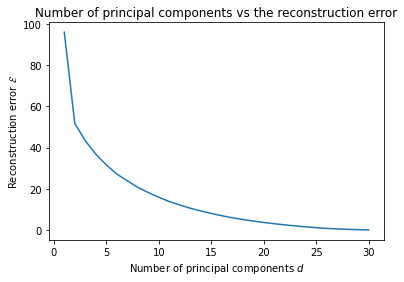

In [4]:
def plot_error(eigvalues,max_d):
    x=range(1,max_d+1)
    errors=[sum(eigvalues[d:]) for d in x]
    plt.plot(x,errors)
    plt.xlabel('Number of principal components $d$')
    plt.ylabel('Reconstruction error $\mathcal{E}$')
    plt.title('Number of principal components vs the reconstruction error')
    plt.show()
    
# plot the number of principal components vs the reconstruction error
plot_error(eigvalues,30)

Now let's try to understand what PCA is doing. For this we plot a few of the rows $\mathbf{u}^{(r)}$ of the optimal compression matrix $\mathbf{W}_{\rm PCA}$. These rows, which are eigenvectors of the sample covariance matrix $\mathbf{Q}$, are sometimes called "principal directions".

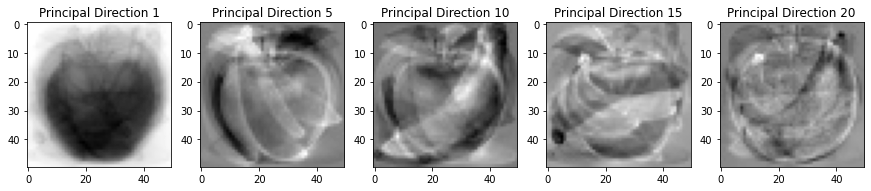

In [5]:
def plot_princ_comp(PCA):
    fig,ax = plt.subplots(1,5,figsize=(15,15))
    # select the principal components we are plotting
    # You can change these to see what other components look like
    plot_pd = [0,4,9,14,19]

    for i in range(len(plot_pd)):
        ax[i].imshow(np.reshape(PCA[plot_pd[i]]*255,(50,50)),cmap='gray')
        ax[i].set_title("Principal Direction %d"%(plot_pd[i]+1))
    plt.show()

plot_princ_comp(PCA)

To get an even better understanding, we want to create the reconstructed images using $ d $ components, i.e. $\mathbf{R} \mathbf{x}^{(i)}$. 

We plot the same images as at the start of the notebook, but now for $d=1,5,50$. 

Can you see the differences? You can try yourself how a different number of $d$ changes the output! 

In [6]:
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec

### Input:
##  X: Dataset
##  d: number of dimensions
##  n_pics: number of pics per class (Apple, Banana). Min 1, Max 15
def plot_reconstruct(X,d, n_pics=5):
    # x=w*z
    X_pca = np.matmul(PCA[:d,:],X[:,:,None])
    # x_reversed=r*x
    X_reversed = np.matmul(PCA[:d,:].T, X_pca)[:,:,0]
    
    # Setup Figure size that scales with number of images
    fig = plt.figure(figsize = (4,max(8*np.log(n_pics),5)))
    
    # Setup a (n_pics,2) grid of plots (images)
    gs = gridspec.GridSpec(n_pics, 2)
    gs.update(wspace=0.0, hspace=0.0)
    for i in range(n_pics):
        for j in range(0,2):
            # Add a new subplot
            ax = plt.subplot(gs[i,j])
            
            # Insert image data into the subplot
            ax.imshow(np.reshape(X_reversed[i+(15*j)],(50,50)),cmap='gray',interpolation='nearest')
            
            # Remove x- and y-axis from each plot
            ax.set_axis_off()
    
    # Setup a visual divider between Apples and Bananas (i.e. a black line between plots)
    transFigure = fig.transFigure.inverted()
    column_divider = Line2D((0.5,0.5),(0.13,0.91),color='black', transform=fig.transFigure)
    fig.lines.extend([column_divider])
    
    # Setup column title for Apples and Bananas.
    plt.subplot(gs[0,0]).set_title('Apples', size='large', y=1.08)
    plt.subplot(gs[0,1]).set_title('Bananas', size='large', y=1.08)
    
    # Render the plot
    plt.show()

Reconstructed image using 1 principal components:


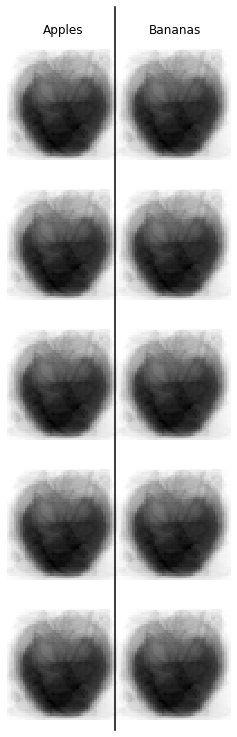

Reconstructed image using 5 principal components:


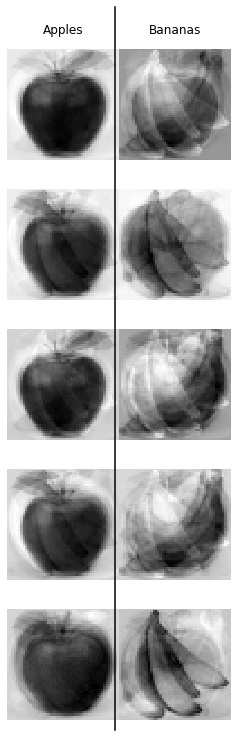

Reconstructed image using 50 principal components:


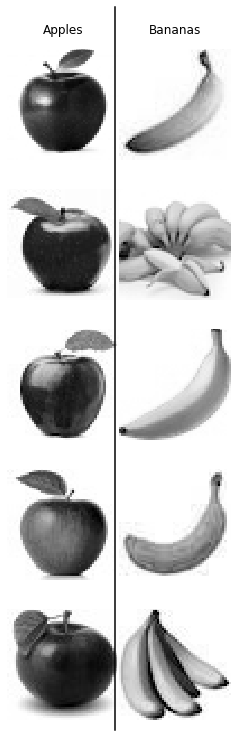

In [7]:
# The values of d to plot for. You can change these to experiment
# If you want to print different amount of pictures, you can change the value of n_pics. (1-15)
num_com=[1,5,50]
for d in num_com:
    print("Reconstructed image using %d principal components:"%(d))
    plot_reconstruct(datamatrix,d,n_pics=5)

## 2.3 PCA for Data Visualization
<a id="Q3"></a>

One of the uses of PCA is visualization. We do PCA with $d=2$  in order to visualize the dataset $\mathbf{z}^{(1)},\ldots,\mathbf{z}^{(N)}$. Indeed, the resulting feature vectors $\mathbf{x}^{(1)} = W_{\rm PCA} \mathbf{z}^{(1)}, \ldots, \mathbf{x}^{(N)} = W_{\rm PCA} \mathbf{z}^{(N)} \in \mathbb{R}^{2}$
can be visualized as a scatter plot whose x-axis represents the first principal component $x_{1}^{(i)}$ and y-asix represents the second principal component $x_{2}^{(i)}$.

Recall that in Round 3 - Classification, we displayed similar scatter plots based on the manually chosen features (the colors). We now used PCA to find the features instead of manually choosing them. 

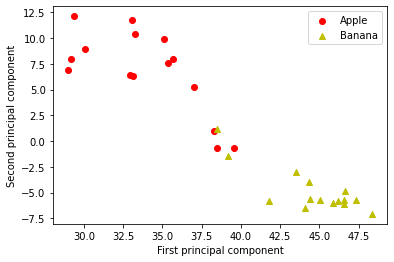

In [8]:
def plot_scatter(PCA,Z):
    # get x for d=2
    X_2d = np.matmul(PCA[:2,:],Z[:,:,None])[:,:,0]

    plt.scatter(X_2d[:15,0],X_2d[:15,1],c='r',marker='o',label='Apple')
    plt.scatter(X_2d[15:,0],X_2d[15:,1],c='y',marker='^',label='Banana')
    plt.legend()
    plt.xlabel('First principal component')
    plt.ylabel('Second principal component')
    plt.show()
    

plot_scatter(PCA,datamatrix/255)